<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [2]:
!pip install scikeras

## Importing necessary libraries

In [5]:
!pip install tensorflow==2.17.1 scikit-learn==1.4.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 -q --user

In [93]:
# Importing essential libraries for data manipulation
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf


# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import time
# Importing libraries for data preprocessing and scaling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing libraries for various metric scores and analysis
from sklearn.metrics import (
    accuracy_score,  # Accuracy metric
    confusion_matrix,  # Confusion matrix metric
    precision_score,  # Precision metric
    recall_score,  # Recall metric
    f1_score,  # F1 score metric
    precision_recall_curve,  # Precision-Recall curve
    auc,  # Area Under the Curve metric
    roc_auc_score,  # ROC-AUC score metric
    roc_curve,  # ROC curve
    classification_report,
)
from sklearn.decomposition import PCA  # Principal Component Analysis
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV


import warnings  # Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # or any {'0', '1', '2', '3'}
from imblearn.over_sampling import SMOTE


# Importing TensorFlow and Keras for neural network modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam,RMSprop
from scikeras.wrappers import KerasClassifier

import keras
from keras import backend
from keras import callbacks
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [7]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [8]:
# Import drive to access the files on My Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
# Import and readi the data set
df = pd.read_csv('/content/drive/My Drive/Kamesh/bank.csv')

## Data Overview

**Top 5 rows of the data**


In [10]:
# View the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Last 5 rows of the data**



In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Understand the shape of the dataset**



In [12]:
df.shape

(10000, 14)

**Check the data types of the columns for the dataset**



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**

*   Every variable is numerical, with the exception of Surname, Geography, and Gender.




**Check for missing values**



In [14]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Observations:**

*There are no missing values in the dataset

**Check for duplicate values**



In [15]:
# checking for duplicate values
df.duplicated().sum()

0

**Observations:**

*There are no duplicate values in the dataset

**Checking for unique values for each of the column**


In [16]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [17]:
# dropping 'RowNumber', 'CustomerId', and 'Surname'
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

**Observations:**
* We drop columns "RowNumber", "CustomerId", "Surname" as they don't give us any additional information in the dataset.

In [18]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Geography',
    'Gender'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

**Checking the Statistical Summary**



In [19]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [20]:
df.describe(exclude="number").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Observations:**

* The majority of customers in the dataset are from 'France,' which appears 5014 times.
* Most customers in the dataset is 'Male,' with a frequency of 5457.

## Exploratory Data Analysis

### Univariate Analysis

In [21]:
def histogram_boxplot(data, feature, figsize=(10,6)):
    """
    Boxplot and histogram combined with KDE curve

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 6))
    """
    # Create subplots with shared x-axis
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="green")

    # Creating Histogram with KDE curve
    sns.histplot(data=data, x=feature, color="green", kde=True, ax=ax_hist)

    # Adding mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    ax_box.set(xlabel='')
    ax_hist.set_xlabel(feature)
    ax_hist.legend()


    plt.tight_layout()


    plt.show()

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**CreditScore Observations**

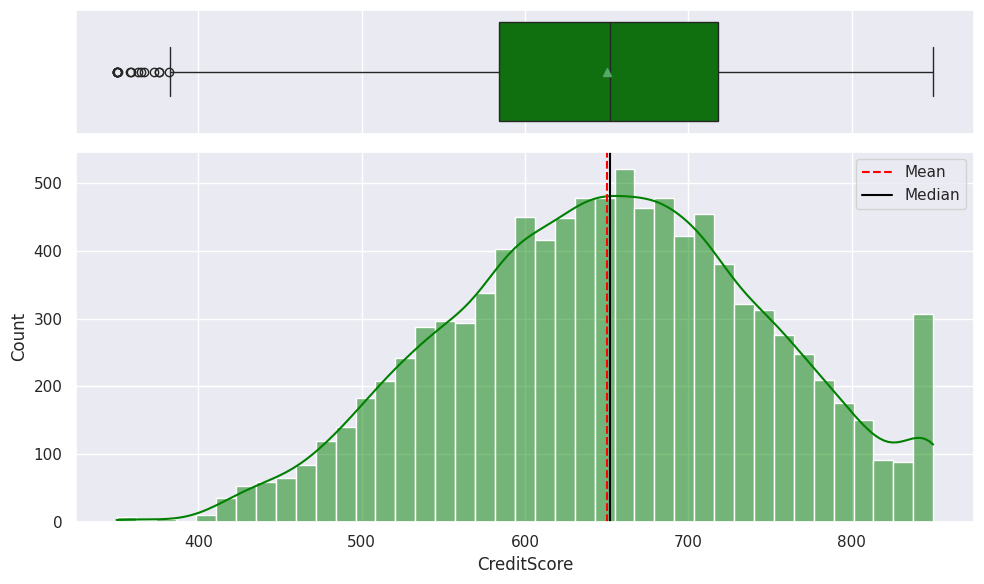

In [25]:
histogram_boxplot(df, "CreditScore")

*Observations:*

* Customer's CreditScore has a median value of about 650, with a mean very slightly lower than that.
* The data is normally distributed with a slight left skew due to outliers.


**Age Observations**

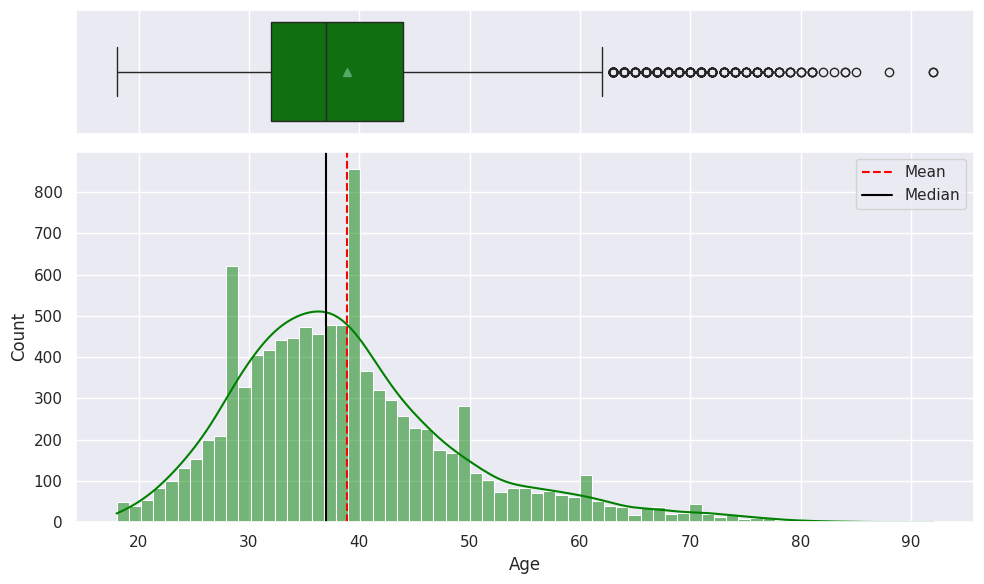

In [26]:
histogram_boxplot(df, "Age")

In [27]:
df['Age'].median()

37.0

In [28]:
df['Age'].mean()

38.9218

**Observations:**

* Observed customers have a median age of 37 and a mean of 38.9 years old.
* Customers over age 62 are appearing as outliers and are right skewing the distribution.

**Balance Observations**

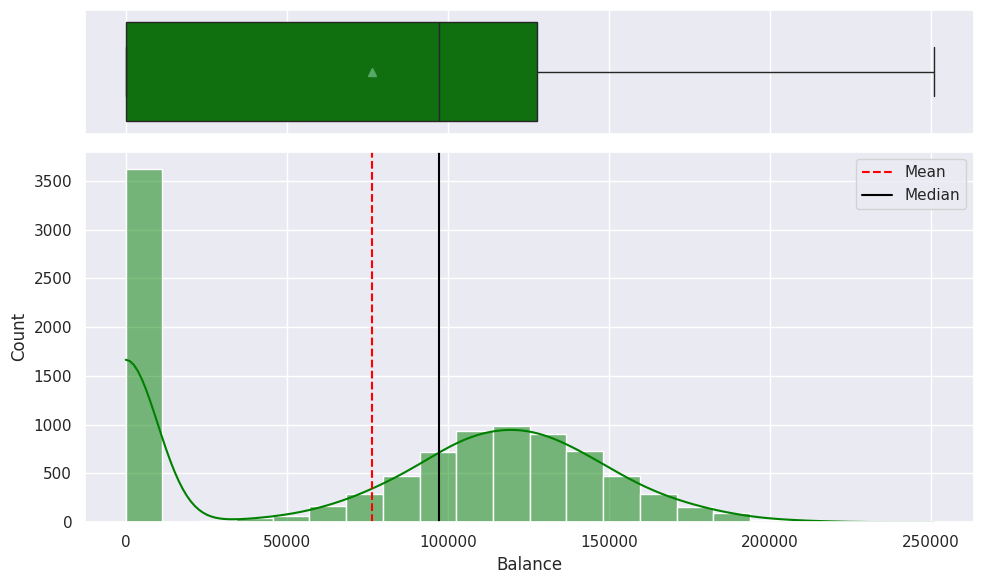

In [29]:
histogram_boxplot(df, "Balance")

In [30]:
df["Balance"].value_counts(1).head(5)*100

,proportion
Balance,
0.00,36.17
130170.82,0.02
105473.74,0.02
159397.75,0.01
144238.70,0.01


**Observations:**


* Observed that 36% of customers have a balance of 0.
* These customers are left skewing the distribution.
* The median balance is almost 100k.

**EstimatedSalary Observations**

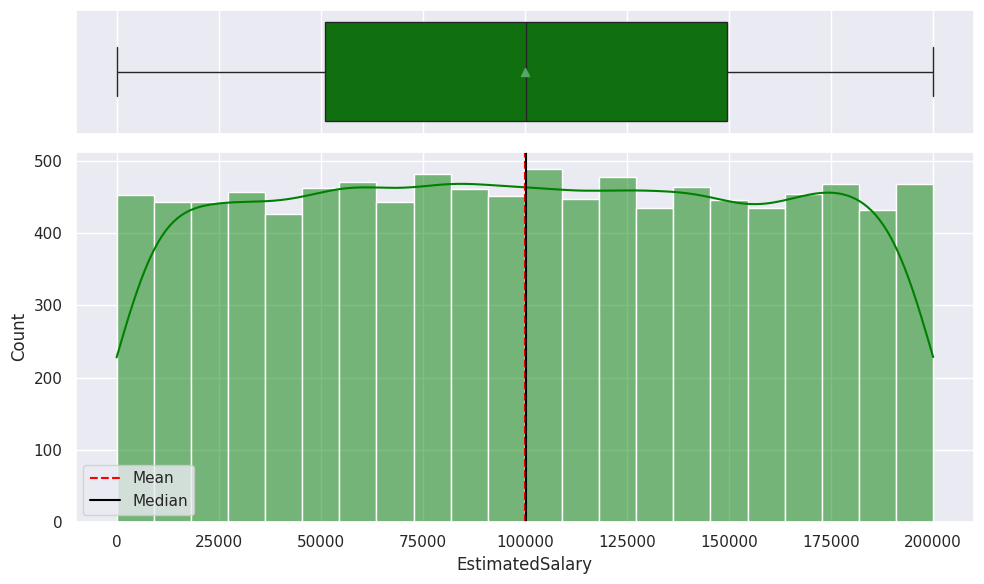

In [31]:
histogram_boxplot(df, 'EstimatedSalary')

**Observations:**

* Customers' EstimatedSalary is evenly distibuted from 0 to 200k.
* The mean and median are approximately equal at 10,000

**Exited Observations**

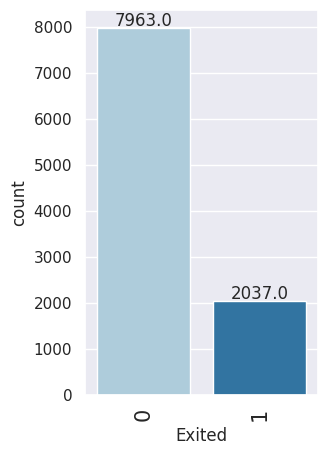

In [32]:
labeled_barplot(df, "Exited")

**Observations**

* Exited is the target variable
* Observed majority class of target variable is 0 - customers who have not exited the bank.

In [33]:
df['Exited'].value_counts(1)*100

,proportion
Exited,
0,79.63
1,20.37


**Observations**

* 79% of customers are existing customers.
* 20% of custsomers have exited.

**Geography Observations**

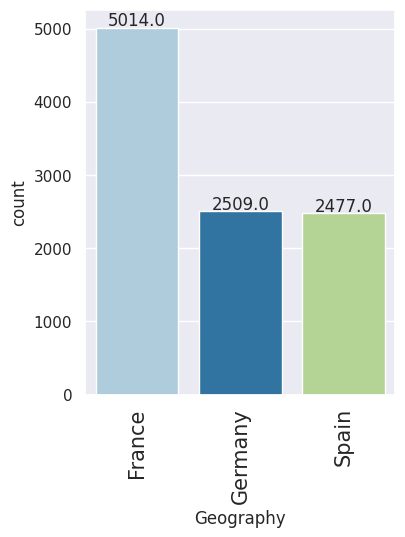

In [34]:
labeled_barplot(df, "Geography")

***Observations***

* Observed about half the customers are located in France.
* Observed about a quarter of customers are located in Germany.
* Observed about a quarter of customers are located in Spain.

**Gender Observations**

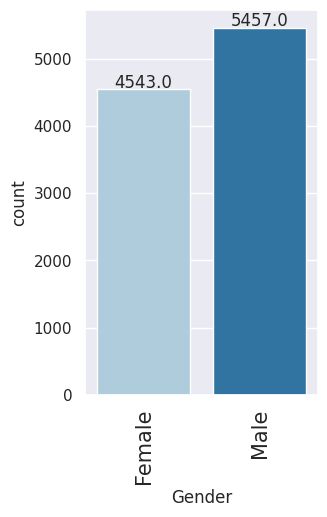

In [35]:
labeled_barplot(df, 'Gender')

In [36]:
df['Gender'].value_counts(1)

,proportion
Gender,
Male,0.5457
Female,0.4543


**Observations:**

* Observed that most customers are male.
* Although males are the majority, 45% are females.


**Tenure Observations**

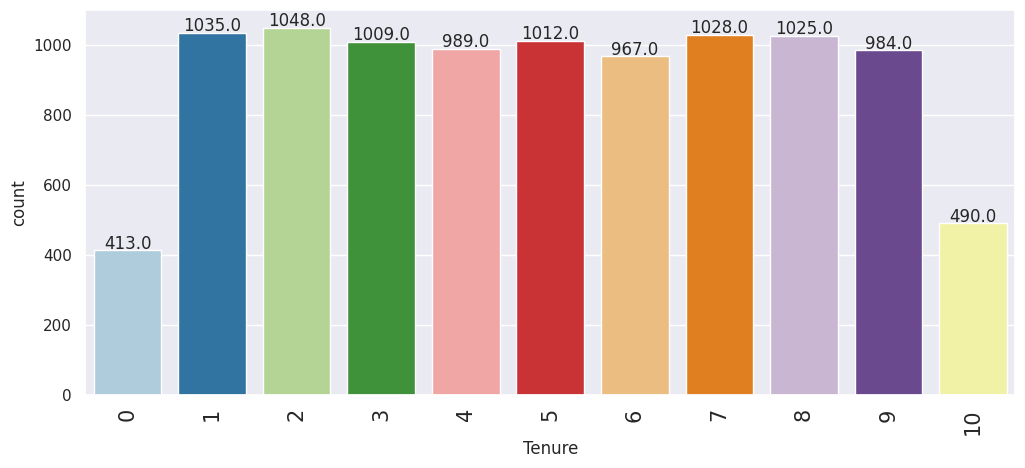

In [37]:
labeled_barplot(df, "Tenure")

***Observations***

* Observed tenure ranges from 0 to 10 years.
* There are many less customers with a tenure of 0 or 10 years compared to other lengths of tenure.
* Tenure lengths of 1 to 9 make up the majority of tenure lengths.
* There are nearly equal amounts of customers with tenure from 1 to 9 years.

**NumOfProducts Observations**

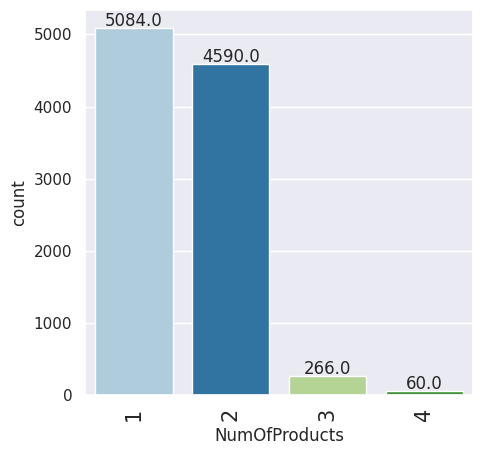

In [38]:
labeled_barplot(df, "NumOfProducts")

In [39]:
df['NumOfProducts'][df['NumOfProducts']>2].value_counts().sum()

326

**Observations:**

* Observed the majority of customers have purchased 1 or 2 products with the bank.
* Observed only 326 customers have purchased more than 2 products with the bank.


**Has Credit Card Observations**

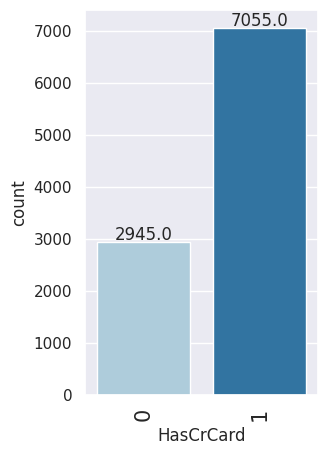

In [40]:
labeled_barplot(df, 'HasCrCard')

In [41]:
df['HasCrCard'].value_counts(1)

,proportion
HasCrCard,
1,0.7055
0,0.2945


**Observations:**

* 70.6% of customers have a credit card.
* 29.4% of customers do not have a credit card.

**Is Active Member Observations**

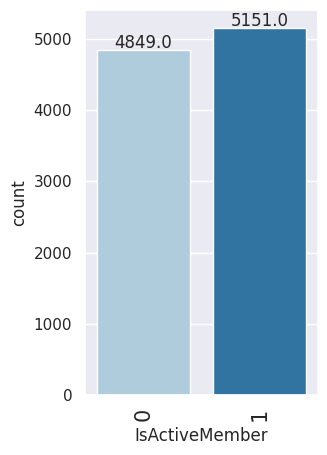

In [42]:
labeled_barplot(df, 'IsActiveMember')

**Observations:**

* Most customers are active members, but its nearly equally distributed.

### Bivariate Analysis

**Correlation plot**


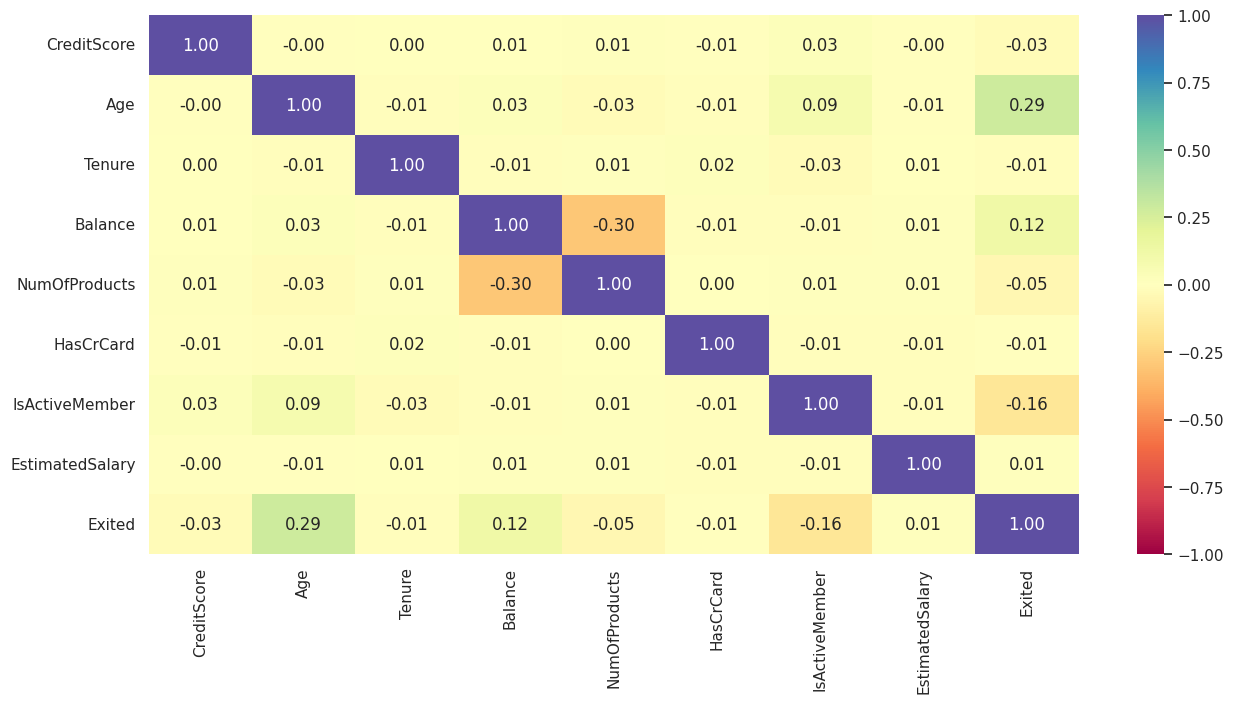

In [43]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

* No significant correlation exists between variables.
* There is some slight positive correlation between Age and Exited.
* There is some slight negative correlation between Balance and NumOfProducts.

**Tenure Vs Exited**


Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


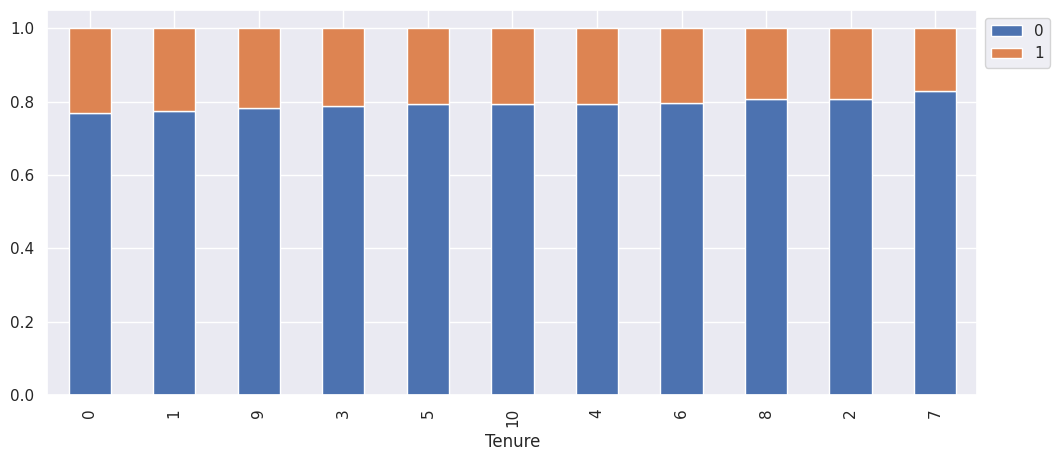

In [44]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Tenure', 'Exited')

**Observations:**

* Observed class ratios are very similar between different tenure lengths.


**Gender Vs Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


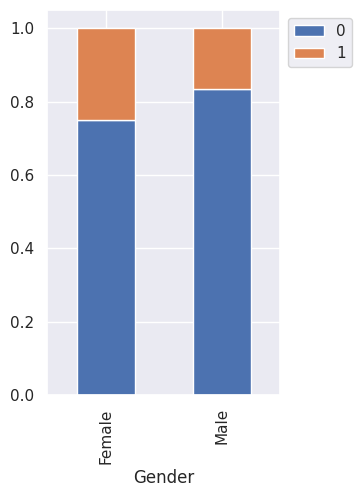

In [45]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Gender', 'Exited')

**Geography Vs Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


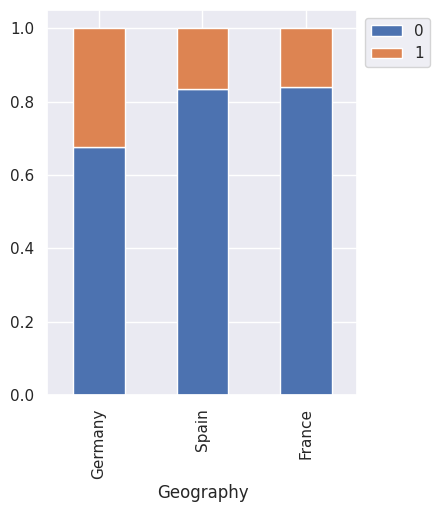

In [46]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Geography', 'Exited')

**Has Credit Card Vs Exited**


Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


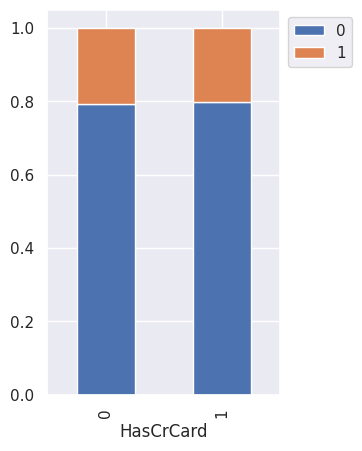

In [47]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'HasCrCard', 'Exited')

**Observations:**

* Observed class ratios are very similar between customers who have credit cards and those who do not have credit cards.


**Is active member Vs Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


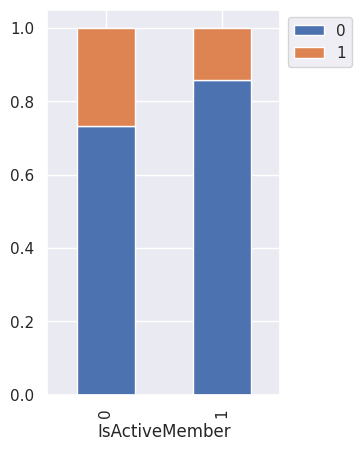

In [48]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

**Observations:**

* Observed that customers who are not considered to be active members exit at a higher rate than customers who are considered active members.

**Number of Products Vs Exited**


Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


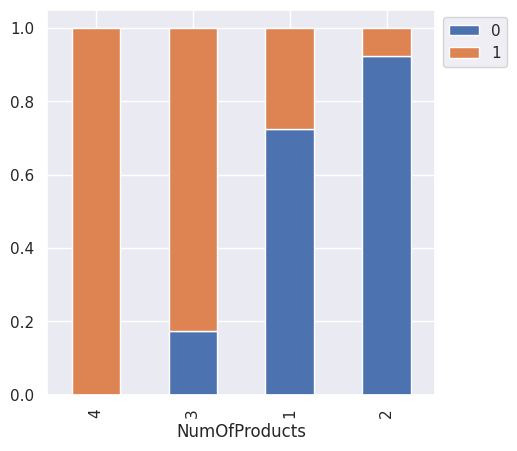

In [49]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'NumOfProducts', 'Exited')

**Observations:**

* All customers who purchased 4 products from the bank have exited.
* The majority of customers who purchased 3 products from the bank have exited.
* Customers who have purchased 1 or 2 products from the bank are exiting at much lower rates.
* Customers who have purchased 2 products from the bank are least likely to leave.

**Exited Vs Credit Score**


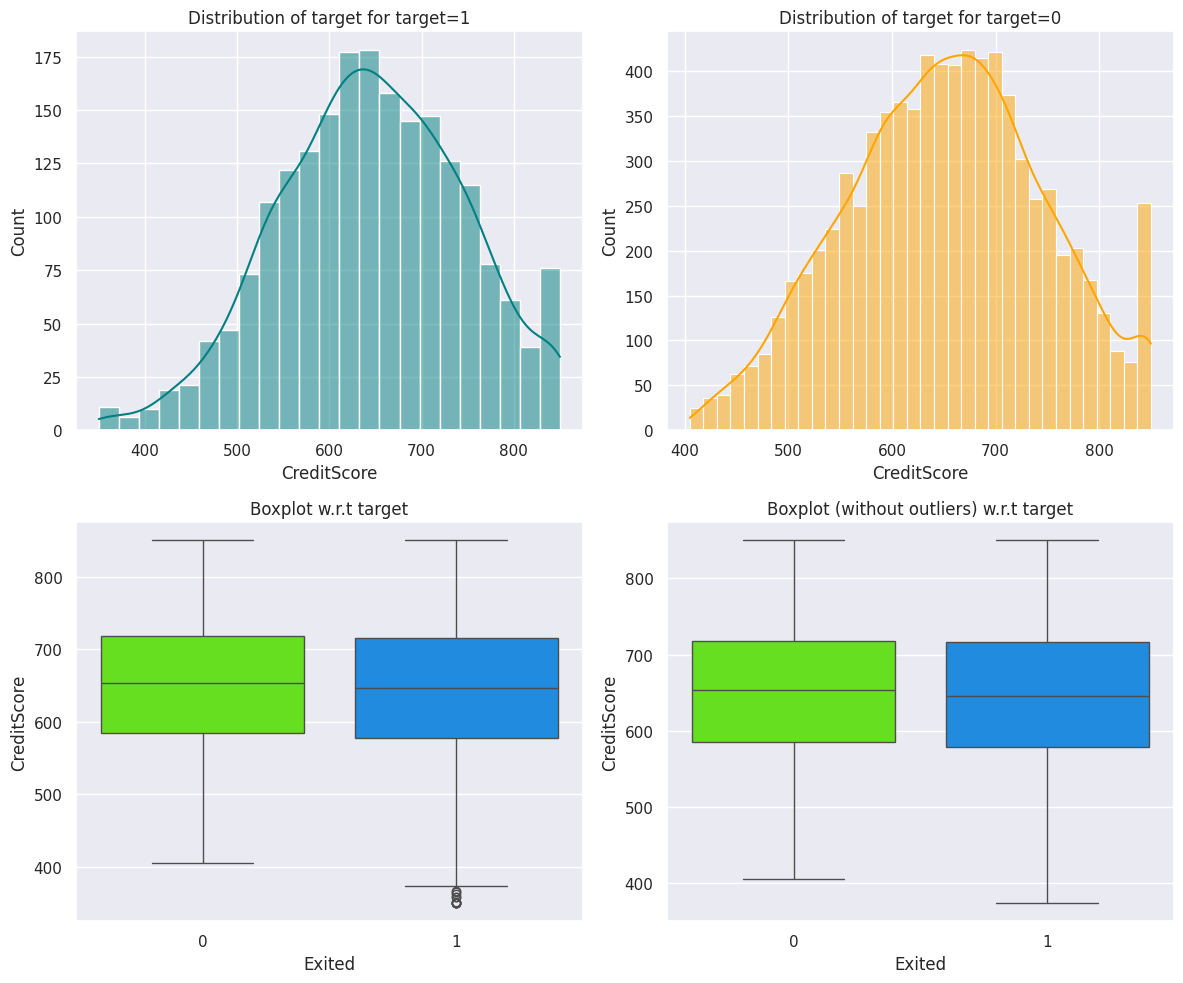

In [50]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "CreditScore", "Exited")

**Observations:**

* The distributions of CreditScore for customers who have exited and customers who have not exited are very similar.
* The box plots of CreditScore for customers who have exited and customers who have not exited are nearly identical.
* The minimum CreditScore of customers who have exited is lower than the min CreditScore of customers who have not exited.

**Exited Vs Age**

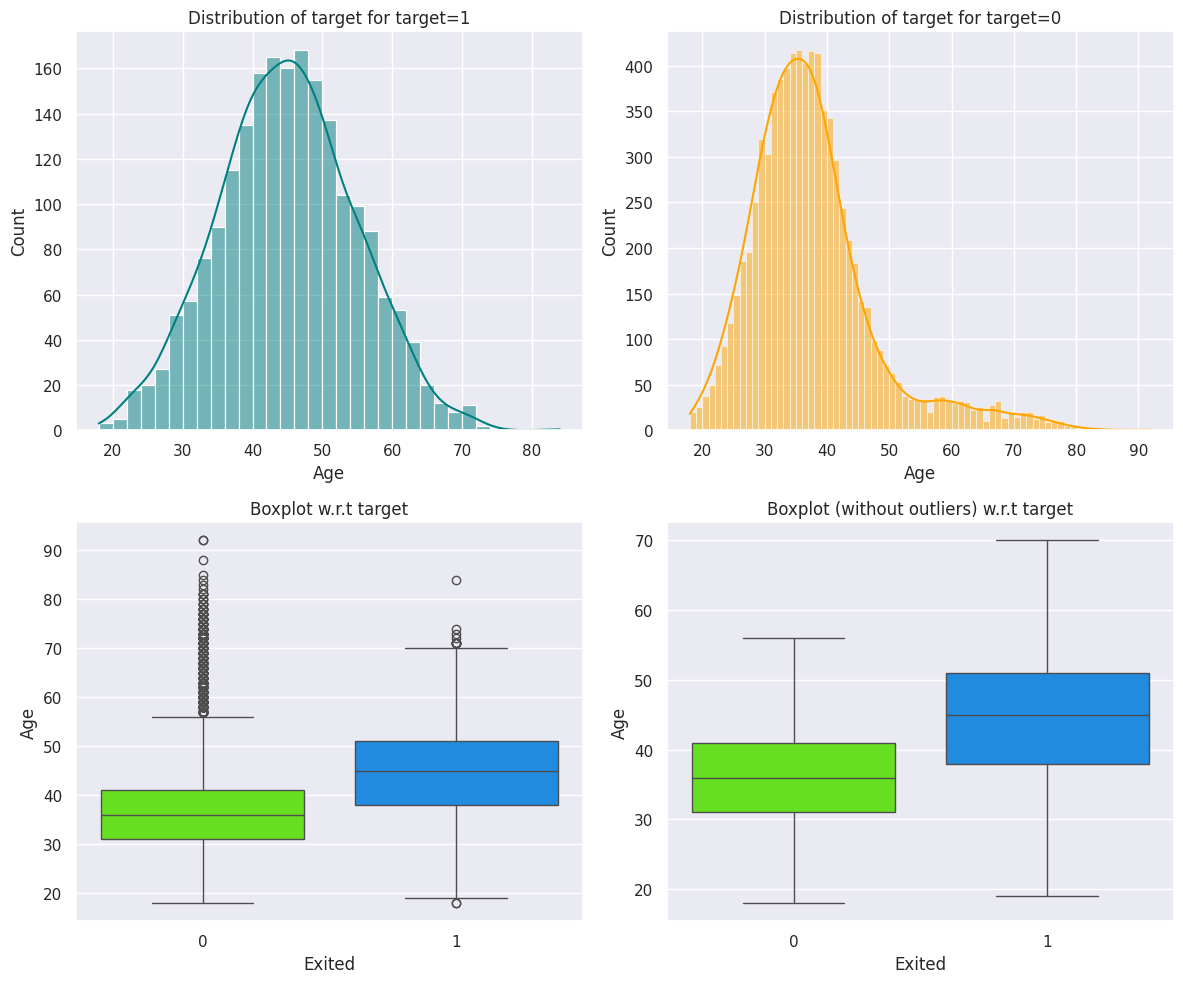

In [51]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Age", "Exited")

**Observations:**

* Observed the median age of customers who have exited is about 45, whereas the median age of customers who have not exited is about 35.
* Observed the max age of customers who have exited is much greated than the max age of customers who have not exited if outliers are ignored.

**Exited Vs Tenure**

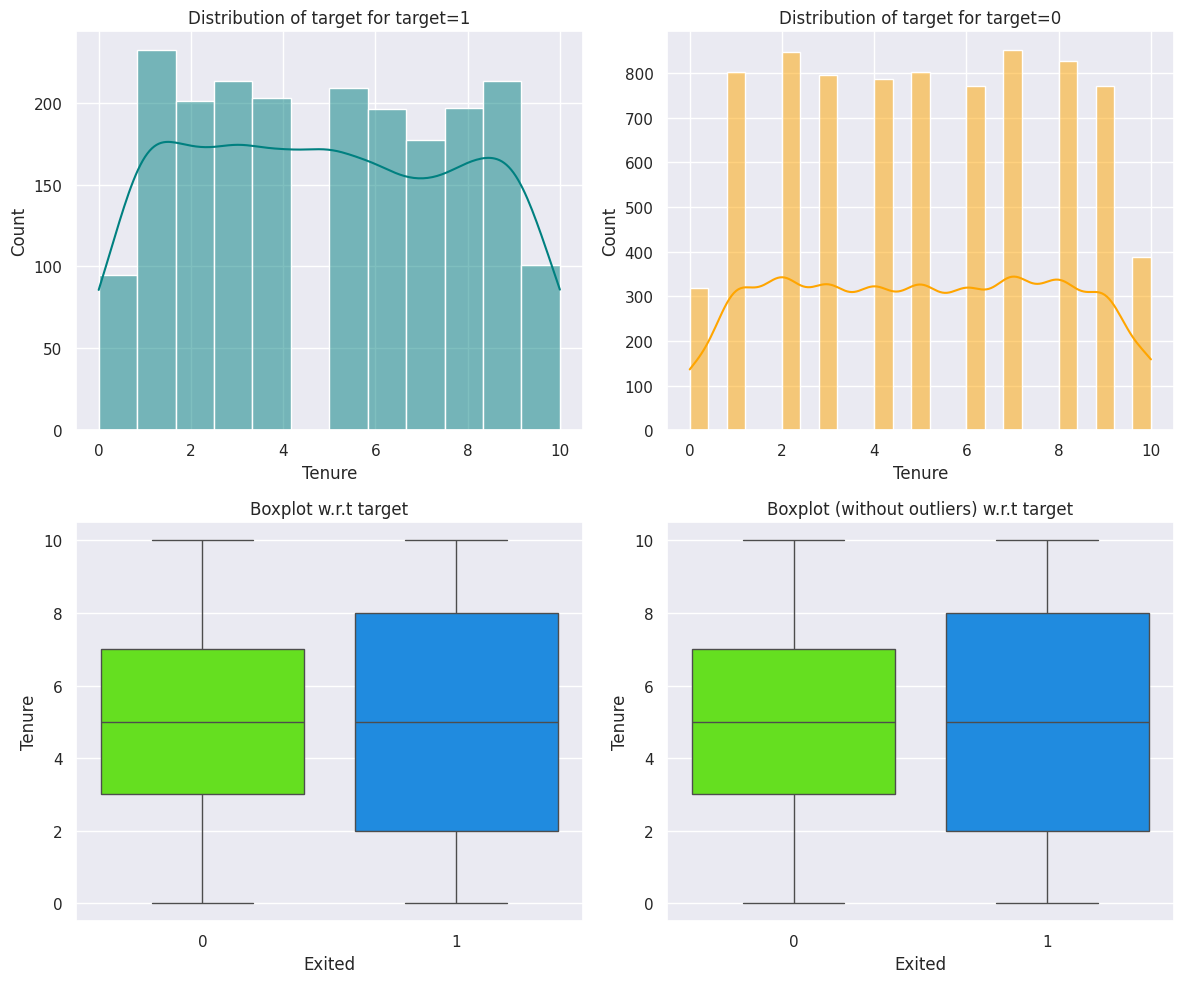

In [52]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Tenure", "Exited")

**Exited Vs Balance**

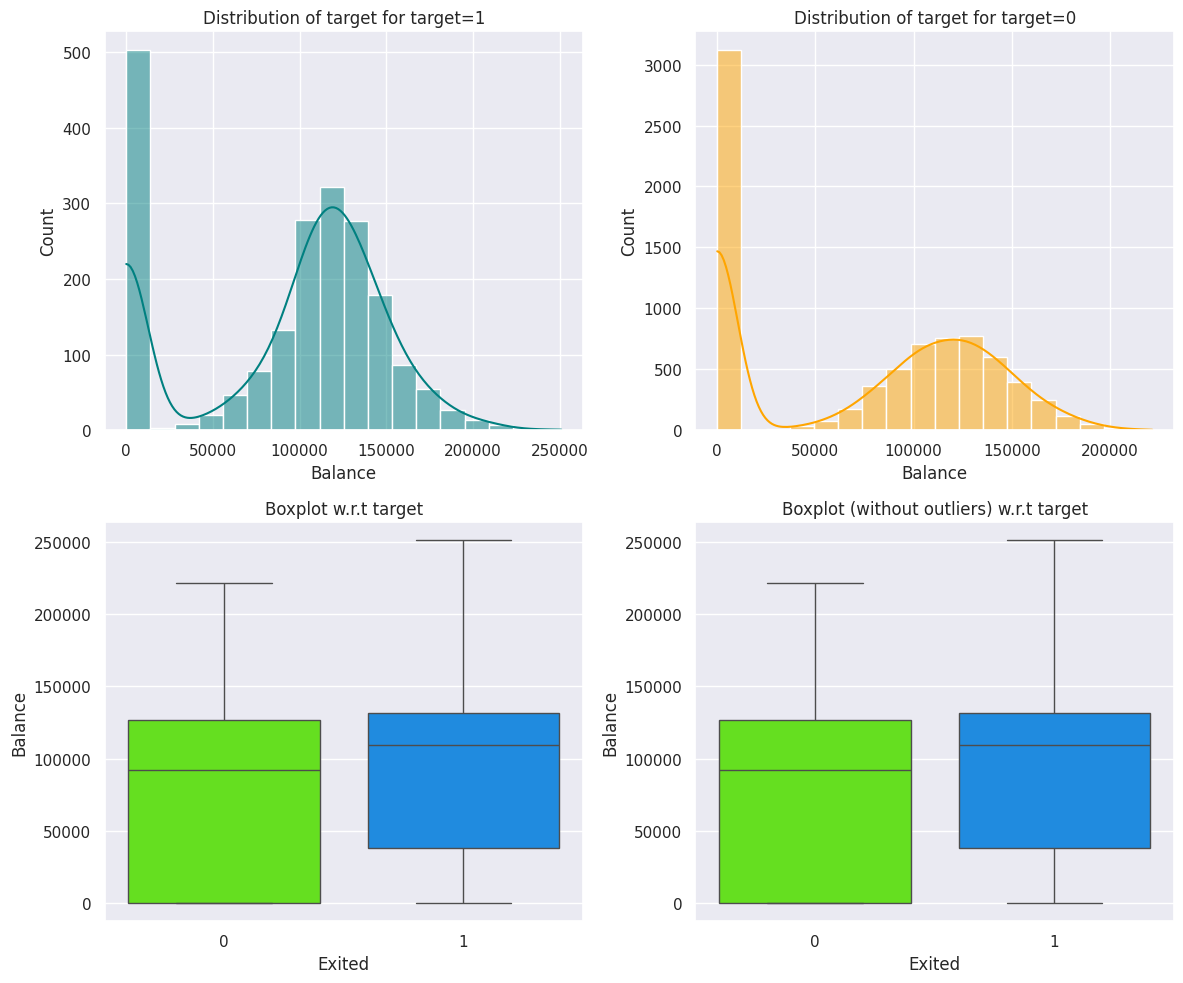

In [53]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Balance", "Exited")

**Observations:**

* Observed that the distribution of account balance for customers who have exited and customers who have not exited is very similar.
* Observed that the peak of the distribution of account balance for customers who have exited is much higher than that of the same distribution for customers who have not exited.
* Observered the max account balance of customers who have exited is higher than the account balance of customers whoe have not exited.

**Exited Vs Number of Products**

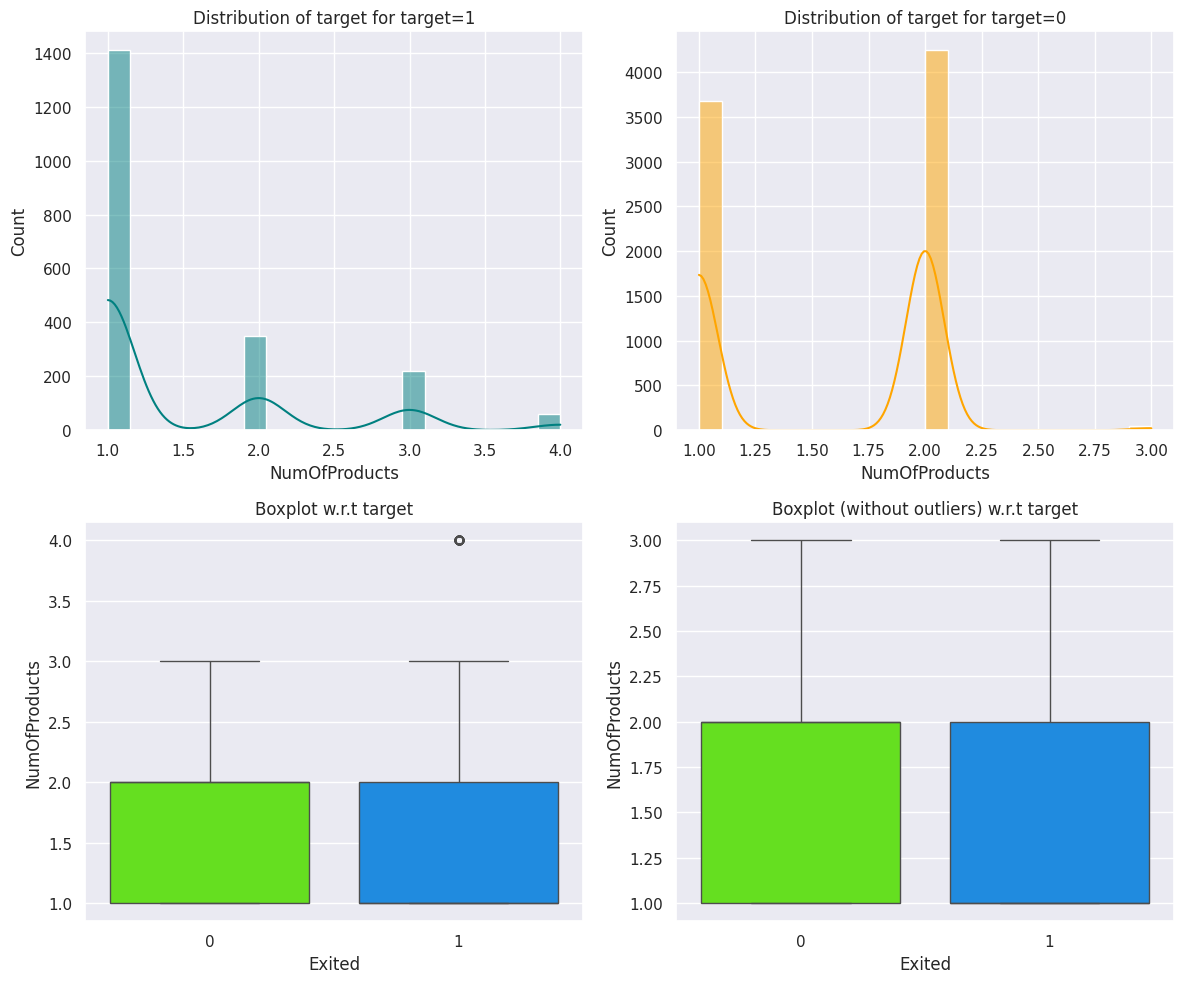

In [54]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")

**Exited Vs Estimated Salary**

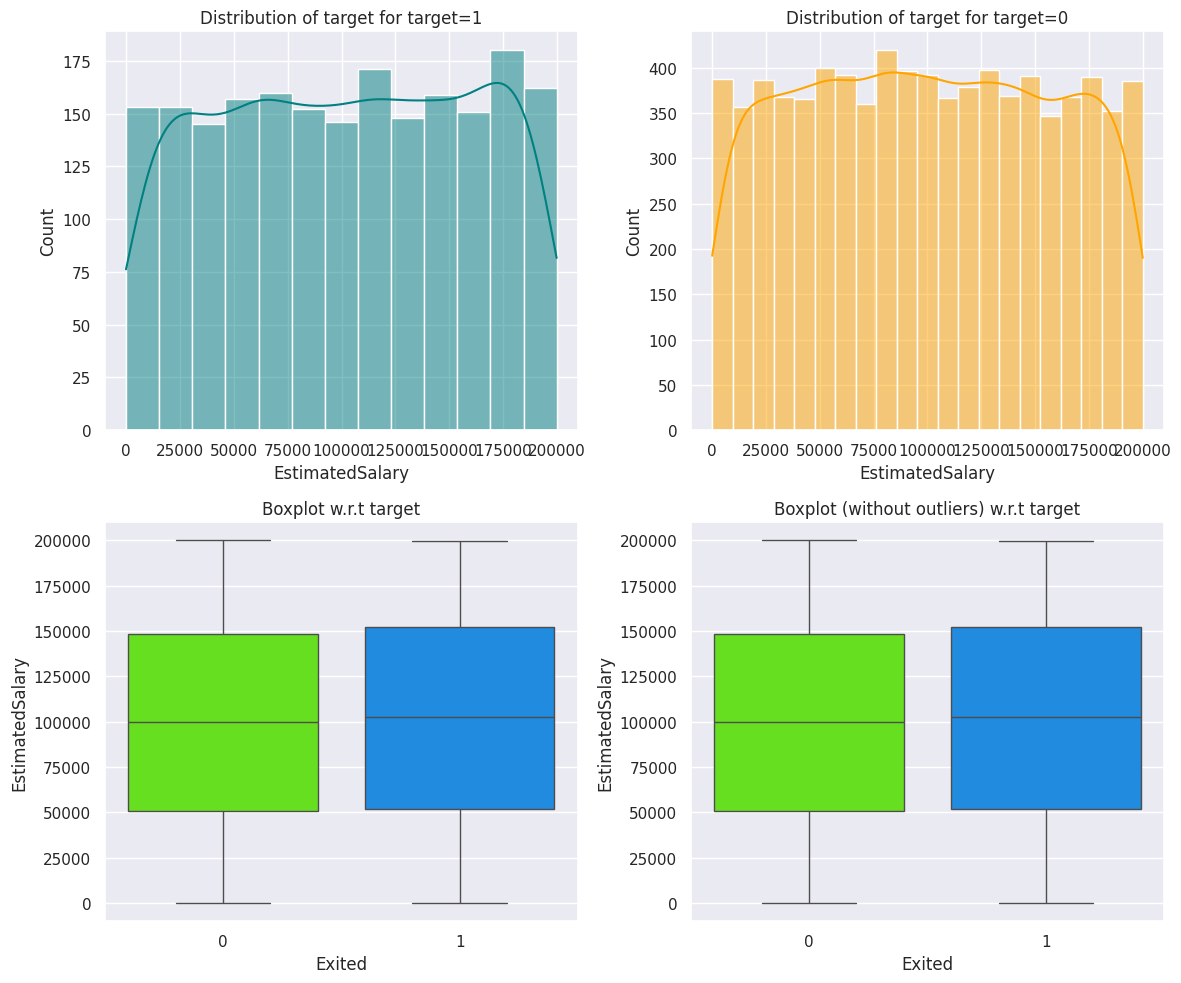

In [55]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

**Observations:**

* Observed that the distribution of EstimatedSalary for customers who have exited and customers who have not exited is nearly identical.
* Observed that the box plots of EstimatedSalary for customers who have exited and customers who have not exited is nearly identical.

## Data Preprocessing

### Outlier Detection


In [56]:
# Code to be used checking for outliers.
# Select only numerical features for outlier analysis
numerical_df = df.select_dtypes(include=np.number)

Q1 = numerical_df.quantile(0.25)  # The 25th percentile.
Q3 = numerical_df.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [ ]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

,0
CreditScore,0.15
Age,3.59
Tenure,0.00
Balance,0.00
NumOfProducts,0.60
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,0.00
Exited,20.37


**Observations:**

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.


**Train-test split**


In [57]:
# Creating the independent variable data frame.
X = df.drop('Exited', axis=1)
# Creating the dependent variable data frame.
y = df['Exited']

**Split data into independent and dependent variables.**



In [58]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [59]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1, stratify=y_temp)

In [60]:
print(X_train.shape, X_val.shape, X_test.shape)

(7000, 10) (1800, 10) (1200, 10)


In [61]:
print(y_train.shape, y_val.shape, y_test.shape)

(7000,) (1800,) (1200,)


In [62]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (7000, 10)
Shape of Validation Set (1800, 10)
Shape of Test Set :  (1200, 10)
****************************************
Percentage of classes in training set:
Exited
0    0.796286
1    0.203714
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Exited
0    0.796111
1    0.203889
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Exited
0    0.796667
1    0.203333
Name: proportion, dtype: float64
****************************************


**Observations:**

* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.

**Encoding categorical variables**



In [63]:
# Encoding categorical variables for use in models.
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

**Observations:**

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [64]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7000, 11)
Shape of X_val: (1800, 11)
Shape of X_test: (1200, 11)


In [65]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (7000,)
Shape of y_val: (1800,)
Shape of y_test: (1200,)


In [66]:
# Specifying columns to scale
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Create a scaler
scaler = StandardScaler()

# Fiting on the training set
scaler.fit(X_train[columns_to_scale])

# Transforming the training set
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

# Transforming the validation and test sets
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [67]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7635,-1.385480,-0.938920,-1.035870,0.460208,1,1,0,1.012113,False,False,False
5284,0.979538,1.142223,-0.689110,0.367663,1,1,1,-1.235424,True,False,True
1457,2.063934,2.561184,-0.342351,-1.215278,2,0,1,-0.615548,False,False,True
4785,-1.447445,-1.601102,-0.689110,1.287744,1,0,0,-0.965064,False,False,False
9158,-1.137618,-0.749725,1.738206,0.670495,1,1,1,1.023469,False,True,False


In [68]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 7635 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   float64
 1   Age                7000 non-null   float64
 2   Tenure             7000 non-null   float64
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   bool   
 9   Geography_Spain    7000 non-null   bool   
 10  Gender_Male        7000 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 512.7 KB


In [69]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 2452 to 64
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1800 non-null   float64
 1   Age                1800 non-null   float64
 2   Tenure             1800 non-null   float64
 3   Balance            1800 non-null   float64
 4   NumOfProducts      1800 non-null   int64  
 5   HasCrCard          1800 non-null   int64  
 6   IsActiveMember     1800 non-null   int64  
 7   EstimatedSalary    1800 non-null   float64
 8   Geography_Germany  1800 non-null   bool   
 9   Geography_Spain    1800 non-null   bool   
 10  Gender_Male        1800 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 131.8 KB


In [70]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 5823 to 5004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1200 non-null   float64
 1   Age                1200 non-null   float64
 2   Tenure             1200 non-null   float64
 3   Balance            1200 non-null   float64
 4   NumOfProducts      1200 non-null   int64  
 5   HasCrCard          1200 non-null   int64  
 6   IsActiveMember     1200 non-null   int64  
 7   EstimatedSalary    1200 non-null   float64
 8   Geography_Germany  1200 non-null   bool   
 9   Geography_Spain    1200 non-null   bool   
 10  Gender_Male        1200 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 87.9 KB


In [71]:
# Checking information of new data frame's columns.
y_train.info()

<class 'pandas.core.series.Series'>
Index: 7000 entries, 7635 to 8407
Series name: Exited
Non-Null Count  Dtype
--------------  -----
7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


In [72]:
# Checking information of new data frame's columns.
y_val.info()

<class 'pandas.core.series.Series'>
Index: 1800 entries, 2452 to 64
Series name: Exited
Non-Null Count  Dtype
--------------  -----
1800 non-null   int64
dtypes: int64(1)
memory usage: 28.1 KB


In [73]:
# Checking information of new data frame's columns.
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1200 entries, 5823 to 5004
Series name: Exited
Non-Null Count  Dtype
--------------  -----
1200 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


**Normalizing numerical data**

In [74]:
# Scaling numerical data of independent variables using StandardScaler()
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

* Predicting a customer is exiting and the customer is not exiting (False Positive - FP)
* Predicting a customer is not exiting and customer is exiting (False Negative - FN)

**Which case is more important?**

* False Negatives (FN) are worse - predicting that customer is not exiting but he/she is exiting.
* It might cause loss to the bank because the bank will not offer these misidentified customers any initiative to retain their business.

**How to reduce this loss i.e need to reduce False Negative?**

* Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing FN. Hence, the focus should be on increasing Recall or minimizing the FN or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

In [99]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [100]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [75]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [88]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [86]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

**Model 0**


In [76]:
# initializing the model
model = Sequential()

#input layer - Changed input_dim to 11 to match X_train shape
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1])) # input_dim updated to match X_train

#hidden layer
model.add(Dense(units=64, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

In [77]:
# Creating the model with SGD optimizer with default learning rate and recall as the metric
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Ensure your data is in the correct format before fitting the model
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

In [81]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [89]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.4018 - recall: 0.8440 - val_loss: 0.6485 - val_recall: 0.6294
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2893 - recall: 0.6320 - val_loss: 0.6253 - val_recall: 0.6703
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2464 - recall: 0.6517 - val_loss: 0.6108 - val_recall: 0.6866
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2172 - recall: 0.6743 - val_loss: 0.6016 - val_recall: 0.7030
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1955 - recall: 0.6921 - val_loss: 0.5934 - val_recall: 0.7139
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1782 - recall: 0.7015 - val_loss: 0.5871 - val_recall: 0.7248
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1638 - recall: 0.7057 - val_loss: 0.5820 - val_recall: 0.7411
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1519 - recall: 0.7142 - val_loss: 0.5776 - val_recall: 0.7411
Epoch 9

In [97]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.500301122665405


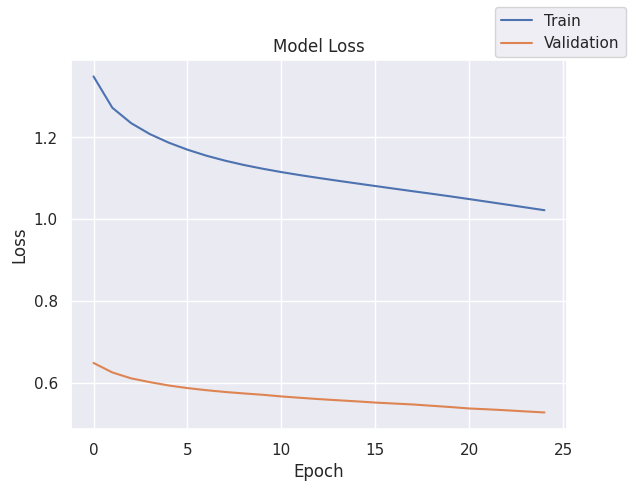

In [101]:
plot(history,'loss')

In [102]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.745714,0.745714,0.824657,0.767329


In [104]:
model_0_valid_perf = model_performance_classification(model, X_val, y_val)
model_0_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.738889,0.738889,0.820662,0.761303


**Model 1**


* After the 5th epoch, the model's rate of learning is low.
* Let's try adding momentum to check whether it's accelerating the learning process.

In [105]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [106]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [107]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [110]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.3758 - val_loss: 0.6658
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1718 - val_loss: 0.6432
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1359 - val_loss: 0.6290
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1119 - val_loss: 0.6093
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.0867 - val_loss: 0.5883
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0610 - val_loss: 0.5554
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0379 - val_loss: 0.5430
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0214 - val_loss: 0.5528
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0014 - val_loss: 0.5292
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9829 - val_loss: 0.5238
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9706 - val_loss: 0.5108
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

In [111]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.499226093292236


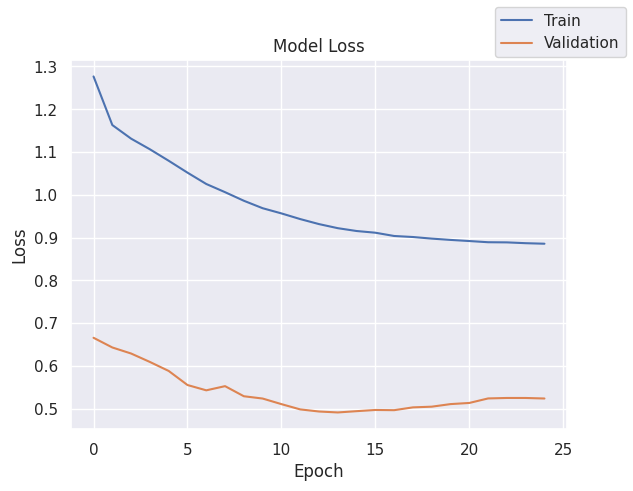

In [112]:
plot(history,'loss')

In [113]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.766,0.766,0.845676,0.786147


In [115]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.747222,0.747222,0.827258,0.768821


**Observations:**

* As expected, there is a improvement in the train scores.
* But, the difference between the train and valid scores have increased.


**Model 2**


* Let's change the optimizer to Adam
     * This will introduce momentum as well as an adaptive learning rate


In [116]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [117]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [118]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [120]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.4513 - val_loss: 0.6367
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2561 - val_loss: 0.5981
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1900 - val_loss: 0.5836
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1551 - val_loss: 0.5769
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1354 - val_loss: 0.5728
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1237 - val_loss: 0.5703
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1148 - val_loss: 0.5655
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1059 - val_loss: 0.5621
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0969 - val_loss: 0.5562
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0870 - val_loss: 0.5516
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0767 - val_loss: 0.5452
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.939090728759766


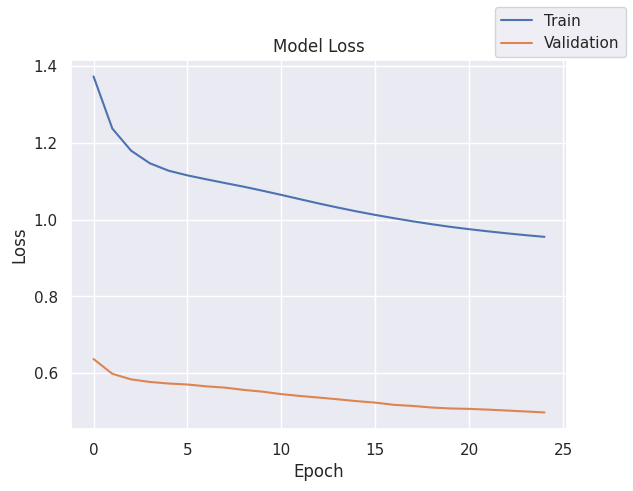

In [122]:
plot(history,'loss')

In [123]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767143,0.767143,0.83727,0.786201


In [125]:
model_2_valid_perf = model_performance_classification(model, X_val, y_val)
model_2_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.752222,0.752222,0.823936,0.772502


**Observations:**

* The difference between the train and valid scores have decreased but not to a great extent.


**Model 3**


* The difference between the train loss and test loss is high.
* Let's add dropout to regularize it.

In [128]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [129]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [130]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [133]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.4131 - val_loss: 0.6846
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3515 - val_loss: 0.6640
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3286 - val_loss: 0.6359
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.3064 - val_loss: 0.6103
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2800 - val_loss: 0.6004
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2705 - val_loss: 0.5975
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2540 - val_loss: 0.5881
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2386 - val_loss: 0.5826
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2325 - val_loss: 0.5794
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2252 - val_loss: 0.5787
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2099 - val_loss: 0.5739
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/s

In [134]:
print("Time taken in seconds ",end-start)

Time taken in seconds  30.030146837234497


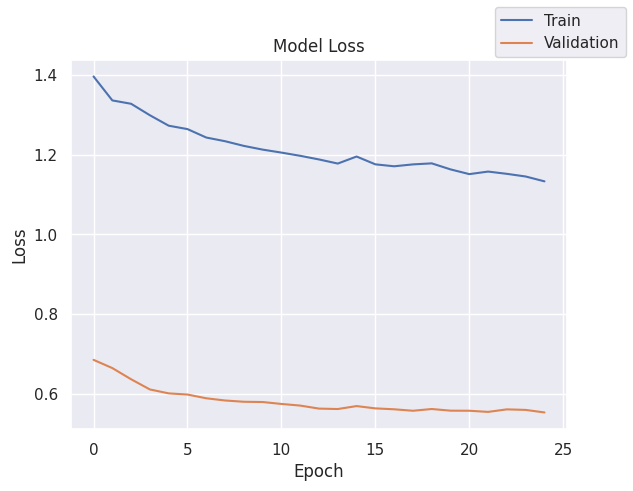

In [135]:
plot(history,'loss')

In [136]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.735,0.735,0.80957,0.756867


In [138]:
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.729444,0.729444,0.809252,0.752342


**Observations:**

* The difference between train and validation scores has still not reduced.


**Model 4**



* The scores are still not that good.
* Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [139]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [140]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [141]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 42 (168.00 B)

In [142]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [143]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1.5867 - val_loss: 0.6399
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.3074 - val_loss: 0.5973
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.2199 - val_loss: 0.5813
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.1684 - val_loss: 0.5688
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1342 - val_loss: 0.5524
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1066 - val_loss: 0.5337
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0796 - val_loss: 0.5160
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0521 - val_loss: 0.5038
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0258 - val_loss: 0.4959
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0008 - val_loss: 0.4830
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9849 - val_loss: 0.4755
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s

In [144]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.879772663116455


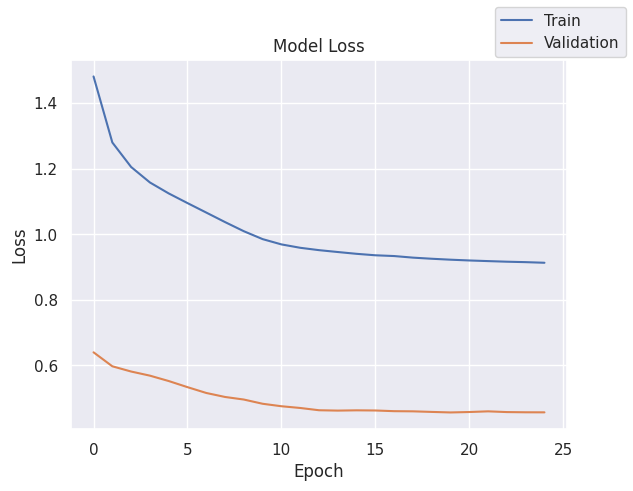

In [145]:
plot(history,'loss')

In [146]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798857,0.798857,0.843971,0.812426


In [147]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.774444,0.774444,0.823418,0.789934


**Model 5**



* Let's add both batchnormalization and dropout.

In [148]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [149]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [150]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 42 (168.00 B)

In [151]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [153]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.6021 - val_loss: 0.6973
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4019 - val_loss: 0.6679
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.3553 - val_loss: 0.6346
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.2994 - val_loss: 0.6108
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2843 - val_loss: 0.6006
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2764 - val_loss: 0.6023
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2449 - val_loss: 0.5941
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2512 - val_loss: 0.5845
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2306 - val_loss: 0.5839
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2138 - val_loss: 0.5749
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2130 - val_loss: 0.5750
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 

In [154]:
print("Time taken in seconds ",end-start)

Time taken in seconds  37.616570711135864


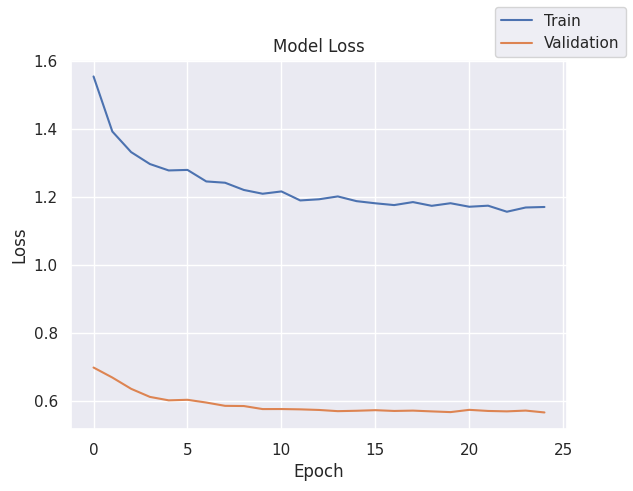

In [155]:
plot(history,'loss')

In [156]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.706,0.706,0.8046,0.73268


In [158]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.712778,0.712778,0.812975,0.738991


**Model 6**


* Let's initialize the weights using He normal.
* We'll also use only Dropout for regularization.


In [159]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [160]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [161]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [164]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.5487 - val_loss: 0.6703
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3934 - val_loss: 0.6451
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3531 - val_loss: 0.6253
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3279 - val_loss: 0.6128
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3045 - val_loss: 0.6047
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3112 - val_loss: 0.5948
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2584 - val_loss: 0.5915
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2621 - val_loss: 0.5809
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2586 - val_loss: 0.5780
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2723 - val_loss: 0.5810
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2456 - val_loss: 0.5759
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

In [165]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.181077003479004


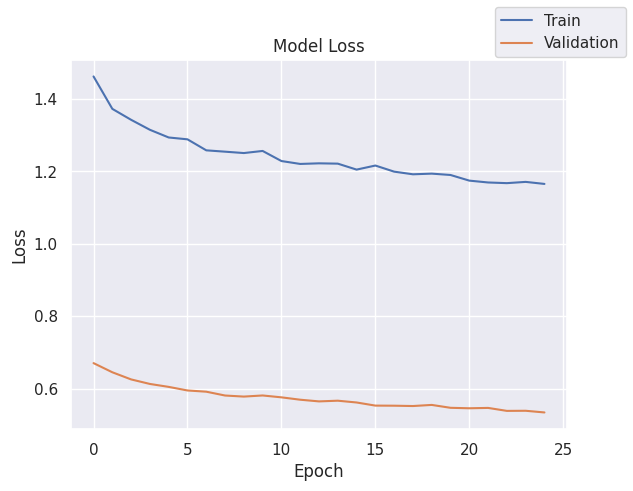

In [166]:
plot(history,'loss')

In [167]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.774143,0.774143,0.81244,0.787488


In [169]:
model_6_valid_perf = model_performance_classification(model, X_val, y_val)
model_6_valid_perf

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767778,0.767778,0.80967,0.782174


**Observations:**

* There's a slight improvement in the scores.
* The difference between train and validation scores has also reduced.

In [91]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [94]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82      5574
         1.0       0.43      0.77      0.55      1426

    accuracy                           0.75      7000
   macro avg       0.68      0.75      0.69      7000
weighted avg       0.82      0.75      0.77      7000



In [95]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1433
         1.0       0.42      0.76      0.54       367

    accuracy                           0.74      1800
   macro avg       0.67      0.75      0.68      1800
weighted avg       0.82      0.74      0.76      1800



In [96]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       956
         1.0       0.41      0.72      0.52       244

    accuracy                           0.73      1200
   macro avg       0.66      0.73      0.67      1200
weighted avg       0.81      0.73      0.76      1200



## Model Performance Comparison and Final Model Selection

In [170]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [171]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [172]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.745714,0.766000,0.767143,0.735000,0.798857,0.70600,0.774143
Recall,0.745714,0.766000,0.767143,0.735000,0.798857,0.70600,0.774143
Precision,0.824657,0.845676,0.837270,0.809570,0.843971,0.80460,0.812440
F1 Score,0.767329,0.786147,0.786201,0.756867,0.812426,0.73268,0.787488


In [173]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.738889,0.747222,0.752222,0.729444,0.774444,0.712778,0.767778
Recall,0.738889,0.747222,0.752222,0.729444,0.774444,0.712778,0.767778
Precision,0.820662,0.827258,0.823936,0.809252,0.823418,0.812975,0.809670
F1 Score,0.761303,0.768821,0.772502,0.752342,0.789934,0.738991,0.782174


In [174]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.006026
"Neural Network (SGD with Momentum, No Regularization)",0.017326
"Neural Network (Adam , No Regularization)",0.013699
"Neural Network (Adam, dropout [0.4,0.2])",0.004525
"Neural Network (Adam, Batch Normalization)",0.022492
"Neural Network (dropout [0.4,0.2], Batch Normalization)",-0.006311
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.005314


**Observations:**

**Final Model:** Neural Network (Adam,dropout [0.4,0.2] ,He initialization)
**Reasoning:**
* Best F1 score on the training set (~0.76), indicating strong performance in learning from the training data.
* Best F1 score on the validation set (~0.76), demonstrating good performance in generalizing to unseen data.
* When considering validation scores only, Model 6 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.


**Model Improvement: Neural Network model with balanced data [SMOTE]**


In [201]:
# Applying SMOTE on training data to oversample data.
sm = SMOTE(random_state=1)
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)
print('After resampling, the shape of X_train: {}'.format(X_train.shape))
print('After resampling, the shape of y_train: {} \n'.format(y_train.shape))

After resampling, the shape of X_train: (7000, 11)
After resampling, the shape of y_train: (7000,) 



In [202]:
# Checking value counts of y_train before oversampling.
y_train.value_counts()

,count
Exited,
0.0,5574
1.0,1426


In [203]:
# Checking value counts of y_train_sm after oversampling.
y_train_sm.value_counts()

,count
Exited,
0.0,5574
1.0,5574


In [204]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [205]:
# Creating a sequential model.
model4 = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding the dropout.
model4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons.
model4.add(Dense(16,activation='relu'))
# Adding the dropout.
model4.add(Dropout(0.1))
# Adding hidden layer with 8 neurons.
model4.add(Dense(8, activation='relu'))
# Adding the output layer.
model4.add(Dense(1, activation = 'relu'))

In [206]:
# Printing model summary.
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
# Defining EarlyStopping as the callback for this model.
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer.
optimizer4 = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics.
model4.compile(optimizer=optimizer4,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model to training data and storing the results.
history4 = model4.fit(X_train_sm,
                      y_train_sm,
                      batch_size=64,
                      epochs=100,
                      verbose=1,
                      validation_data = (X_val,y_val),
                      callbacks=[es_cb])

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5140 - loss: 1.5109 - val_accuracy: 0.7800 - val_loss: 0.5927
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5949 - loss: 0.7227 - val_accuracy: 0.7756 - val_loss: 0.5718
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6247 - loss: 0.6855 - val_accuracy: 0.7828 - val_loss: 0.5497
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6442 - loss: 0.6656 - val_accuracy: 0.7800 - val_loss: 0.5405
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6471 - loss: 0.6741 - val_accuracy: 0.7722 - val_loss: 0.5598
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6701 - loss: 0.6481 - val_accuracy: 0.7611 - val_loss: 0.5738
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6838 - loss: 0.6549 - val_accuracy: 0.7617 - val_loss: 0.5467
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6933 - loss: 0.6291 - val_accu

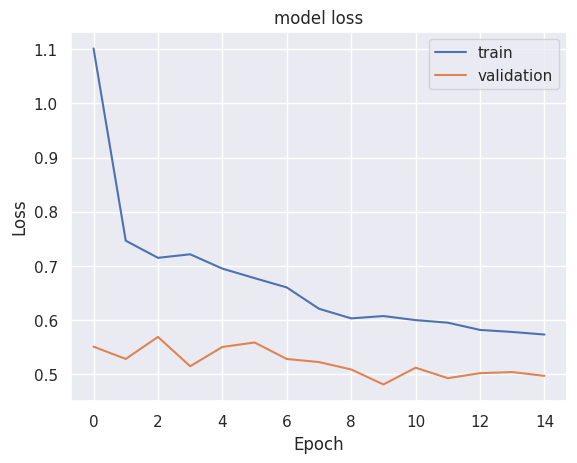

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7556 - loss: 0.5099


In [196]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model4.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best Threshold=0.486662, G-Mean=0.739


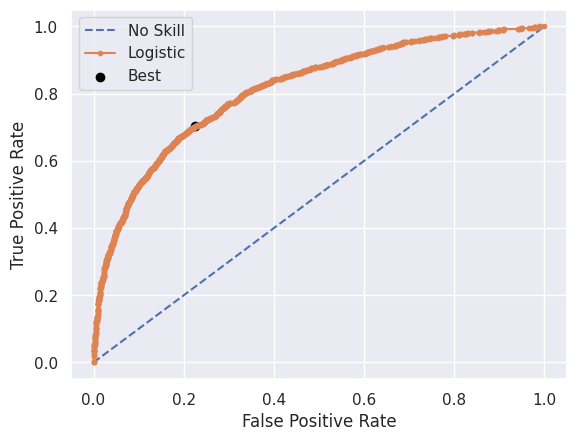

In [197]:
# Predicting probabilities.
yhat4 = model4.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat4 = yhat4[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds4 = roc_curve(y_train, yhat4)
# Calculating the g-mean for each threshold.
gmeans4 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [198]:
# Predicting the results using best as a threshold.
y_pred4 = model4.predict(X_val)
y_pred4 = (y_pred4 >thresholds4[ix])
y_pred4

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

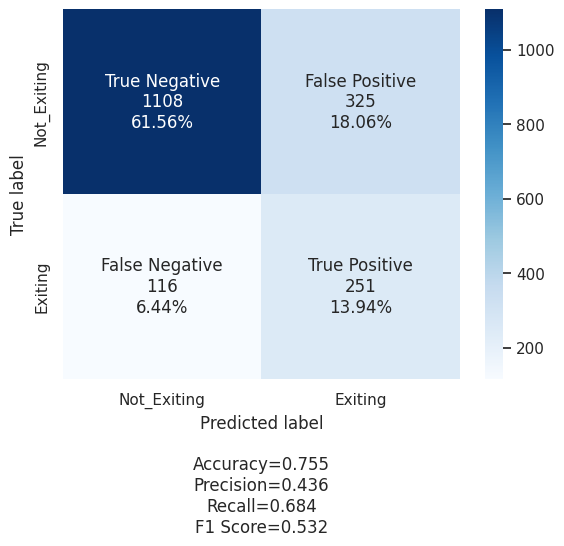

In [199]:
# Calculating the confusion matrix.
cm4 = confusion_matrix(y_val, y_pred4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [200]:
# Accuracy as per the classification report.
cr4 = sklearn.metrics.classification_report(y_val,y_pred4)
print(cr4)

              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83      1433
         1.0       0.44      0.68      0.53       367

    accuracy                           0.76      1800
   macro avg       0.67      0.73      0.68      1800
weighted avg       0.81      0.76      0.77      1800



**Final Model**


In [175]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [176]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [177]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [180]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.0785 - val_loss: 0.7418
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4993 - val_loss: 0.6684
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3893 - val_loss: 0.6430
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3629 - val_loss: 0.6342
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3335 - val_loss: 0.6245
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3232 - val_loss: 0.6139
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2912 - val_loss: 0.6039
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2914 - val_loss: 0.5972
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2710 - val_loss: 0.5880
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2474 - val_loss: 0.5850
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2561 - val_loss: 0.5765
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/

In [181]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [182]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      5574
         1.0       0.42      0.69      0.52      1426

    accuracy                           0.74      7000
   macro avg       0.66      0.72      0.67      7000
weighted avg       0.81      0.74      0.76      7000



In [183]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      1433
         1.0       0.41      0.71      0.52       367

    accuracy                           0.74      1800
   macro avg       0.66      0.72      0.67      1800
weighted avg       0.81      0.74      0.76      1800



In [185]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82       956
         1.0       0.41      0.66      0.51       244

    accuracy                           0.74      1200
   macro avg       0.66      0.71      0.67      1200
weighted avg       0.80      0.74      0.76      1200



**Observations:**

* The weighted F1 score on the test data is ~0.74
* A F1 score of ~0.74 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.
*Model can be further tuned to deal with minority class.



## Actionable Insights and Business Recommendations

**Engagement of dormant Members:** The bank might launch a campaign to turn dormant members into active clients. To help these clients get the most out of their accounts, this can entail contacting them with exclusive deals or incentives or offering them individualized financial guidance.

**Product Retention and Diversification:** There is a chance to encourage customers to diversify their product holdings because the minority of customers who only own one product (51%). Create retention techniques to hold on to clients that possess numerous items, like incentives or packaged services.

**Services That Consider Age:** Given that quitting a bank is positively correlated with age, you should think about offering age-specific services or incentives to keep customers in particular age ranges. Customizing services to fit various stages of life could increase client retention.

**Retention based on Tenure:** Higher rates of customer churn are seen among those with shorter tenures—one year and zero years. Use promotions, individualized services, or onboarding programs to win over more customers throughout the early years of their bank relationship.



<font size=6 color='blue'>Power Ahead</font>
___